In [1]:
# Задание 1
# Импортируйте библиотеки pandas и numpy.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, 
# чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
# Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
# Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
# Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
data = boston.data
data.shape

(506, 13)

In [5]:
target = boston.target

In [6]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# Создадим два датафрейма

In [8]:
X = pd.DataFrame(data, columns=feature_names)
#X.head()
#X.info()

In [9]:
y = pd.DataFrame(target, columns=['price'])
#y.head()
#y.info()

In [10]:
# Разбиение данных на тренировочный и тестовый датасеты

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#### Построение модели линейной регрессии

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = lr.predict(X_test)

In [15]:
# Метрики оценки качества регрессионных моделей
# R2
from sklearn.metrics import r2_score

In [16]:
r2_score(y_test, y_pred)

0.7109203586326303

In [17]:
# Задание 2
# Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
# Сделайте агрумент n_estimators равным 1000, 
# max_depth должен быть равен 12 и random_state сделайте равным 42.

# Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, 
# но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
# чтобы получить из датафрейма одномерный массив Numpy,
# так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

# Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
# Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=12, random_state=42, n_estimators=1000)
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test.values[:, 0], y_pred)

0.8758073546581215

In [22]:
# Получилось, что модель model, обученная с помощью RandomForestRegressor, 
# показала более высокие показатели (R2) по-сравнению с моделью lr (LinearRegression). 
# Стоит заметить, что время обучения модели model тоже больше.  

In [23]:
# * Задание 3
# Вызовите документацию для класса RandomForestRegressor,
# найдите информацию об атрибуте feature_importances_.

# С помощью этого атрибута найдите сумму всех показателей важности,
# установите, какие два признака показывают наибольшую важность.

In [24]:
# ? RandomForestRegressor

Text(0,0.5,'Признак')

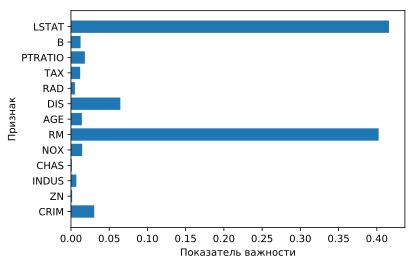

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.barh(X_train.columns, model.feature_importances_)
plt.xlabel('Показатель важности')
plt.ylabel('Признак')

In [26]:
#LSTAT, RM - самые важные признаки

In [27]:
model.feature_importances_.sum()

0.9999999999999991

In [28]:
# * Задание 4
# В этом задании мы будем работать с датасетом, с которым мы уже 
# знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.

# Для этого датасета мы будем решать задачу классификации - будем определять, 
# какие из транзакциции по кредитной карте являются мошенническими.

# Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),
# так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.
# Мы будем вычислять AUC, то есть площадь под кривой ROC.

# Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

# Загрузите датасет creditcard.csv и создайте датафрейм df.
# С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.
# Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

# Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
# pd.options.display.max_columns = 100.

# Просмотрите первые 10 строк датафрейма df.

# Создайте датафрейм X из датафрейма df, исключив столбец Class.
# Создайте объект Series под названием y из столбца Class.

# Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, 
# используя аргументы: test_size=0.3, random_state=100, stratify=y.
# У вас должны получиться объекты X_train, X_test, y_train и y_test.
# Просмотрите информацию о их форме.

# Для поиска по сетке параметров задайте такие параметры:
# parameters = [{'n_estimators': [10, 15], 
# 'max_features': np.arange(3, 5),
# 'max_depth': np.arange(4, 7)}]

# Создайте модель GridSearchCV со следующими аргументами:
# estimator=RandomForestClassifier(random_state=100), 
# param_grid=parameters,
# scoring='roc_auc',
# cv=3.

# Обучите модель на тренировочном наборе данных (может занять несколько минут).

# Просмотрите параметры лучшей модели с помощью атрибута best_params_.

# Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
# Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

# Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
# Вычислите AUC на тестовых данных и сравните с результатом, 
# полученным на тренировочных данных, используя в качестве аргументов
# массивы y_test и y_pred_proba.

In [29]:
plt.style.use('fivethirtyeight')
df = pd.read_csv('creditcard.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [31]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [32]:
pd.options.display.max_columns = 100

In [33]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [34]:
X = df.copy()
X.drop(['Class'], axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [35]:
y = df.copy()
y = df['Class']

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [38]:
parameters = [{'n_estimators': [10, 15], 
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100), 
    param_grid=parameters,
    scoring='roc_auc',
    cv=3)

In [39]:
clf.fit(X_train, y_train)

NameError: name 'X_valid' is not defined

In [40]:
clf.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 15}

In [45]:
y_pred = clf.predict_proba(X_test)

In [47]:
y_pred_proba = y_pred[:,1]

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

1.0

In [ ]:
# *Дополнительные задания:
# 1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.
# 2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. 
# Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.
# 3). Просмотрите данные, описание и названия признаков в датасете. 
# Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.
# 4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.
# 5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.
# 6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
# 7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.
# 8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.
# 9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 
# (причем, само поле target не должно входить в этот список).
# 10). Удалите из датафрейма X поле с целевой переменной. 
# Для всех признаков, названия которых содержатся в списке high_corr, 
# вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', 
# добавленного к первоначальному названию признака. 
# Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, 
# а также поля с признаками из списка high_corr, возведенными в квадрат. 
# Выведите описание полей датафрейма X с помощью метода describe.